In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyodbc
import seaborn as sns
from pathlib import Path

In [22]:
file = Path('sr28.accdb')
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=' + str(file.resolve()))
cursor = conn.cursor()

In [23]:
query = """
SELECT d."Long_Desc"            AS "Long Description",
       d."Shrt_Desc"            AS "Short Description",
       g."FdGrp_Desc"           AS "Food Group Name",
       d."FdGrp_Cd"             AS "Food Group",
       a."Water_(g)"            AS "Water (g)",
       a."Energ_Kcal"           AS "Energy (Kcal)",
       a."Protein_(g)"          AS "Protein (g)",
       a."Lipid_Tot_(g)"        AS "Lipids (g)",
       a."Carbohydrt_(g)"       AS "Carbohydrates (g)",
       a."Fiber_TD_(g)"         AS "Fiber (g)",
       a."Sugar_Tot_(g)"        AS "Sugars (g)",
       a."Calcium_(mg)"         AS "Calcium (mg)", 
       a."Iron_(mg)"            AS "Iron (mg)",
       a."Magnesium_(mg)"       AS "Magnesium (mg)",
       a."Phosphorus_(mg)"      AS "Phosphorus (mg)",
       a."Potassium_(mg)"       AS "Potassium (mg)",
       a."Sodium_(mg)"          AS "Sodium (mg)",
       a."Zinc_(mg)"            AS "Zinc (mg)",
       a."Copper_mg)"           AS "Copper (mg)",
       a."Manganese_(mg)"       AS "Manganese (mg)",
       a."Selenium_(µg)"        AS "Selenium (µg)",
       a."Vit_C_(mg)"           AS "Vitamin C (mg)",
       a."Thiamin_(mg)"         AS "Thiamin (mg)",
       a."Riboflavin_(mg)"      AS "Riboflavin (mg)",
       a."Niacin_(mg)"          AS "Niacin (mg)",
       a."Panto_Acid_mg)"       AS "Pantothenic Acid (mg)",
       a."Vit_B6_(mg)"          AS "Vitamin B6 (mg)",
       a."Folate_Tot_(µg)"      AS "Folates (µg)",
       a."Choline_Tot_ (mg)"    AS "Choline (mg)",
       a."Vit_B12_(µg)"         AS "Vitamin B12 (µg)",
       a."Vit_A_IU"             AS "Vitamin A (IU)",
       a."Retinol_(µg)"         AS "Retinol (µg)",
       a."Alpha_Carot_(µg)"     AS "Alpha-carotene (µg)",
       a."Beta_Carot_(µg)"      AS "Beta-carotene (µg)",
       a."Beta_Crypt_(µg)"      AS "Beta-cryptoxanthin (µg)",
       a."Lycopene_(µg)"        AS "Lycopene (µg)",
       a."Lut+Zea_ (µg)"        AS "Lutein/Zeaxanthin (µg)",
       a."Vit_E_(mg)"           AS "Vitamin E (mg)",
       a."Vit_D_IU"             AS "Vitamin D (IU)",
       a."Vit_K_(µg)"           AS "Vitamin K (µg)",
       a."FA_Sat_(g)"           AS "Saturated Fat (g)",
       a."FA_Mono_(g)"          AS "Monounsaturated Fat (g)",
       a."FA_Poly_(g)"          AS "Polyunsaturated Fat (g)",
       a."Cholestrl_(mg)"       AS "Cholesterol (mg)"
FROM (ABBREV a
INNER JOIN FOOD_DES d
    ON a.NDB_No = d.NDB_No)
INNER JOIN FD_GROUP g
    ON d.FdGrp_Cd = g.FdGrp_CD;
"""

df_raw = pd.read_sql(query, conn)
df_raw.head()

C:\Users\wardj\AppData\Local\Temp\ipykernel_24556\443533702.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_raw = pd.read_sql(query, conn)


,Long Description,Short Description,Food Group Name,Food Group,Water (g),Energy (Kcal),Protein (g),Lipids (g),Carbohydrates (g),Fiber (g),...,Beta-cryptoxanthin (µg),Lycopene (µg),Lutein/Zeaxanthin (µg),Vitamin E (mg),Vitamin D (IU),Vitamin K (µg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated Fat (g),Cholesterol (mg)
0,"Butter, salted","BUTTER,WITH SALT",Dairy and Egg Products,0100,15.87,717,0.85,81.11,0.06,0.0,...,0.0,0.0,0.0,2.32,0.0,7.0,51.368,21.021,3.043,215.0
1,"Butter, whipped, with salt","BUTTER,WHIPPED,W/ SALT",Dairy and Egg Products,0100,16.72,718,0.49,78.30,2.87,0.0,...,6.0,0.0,13.0,1.37,0.0,4.6,45.390,19.874,3.331,225.0
2,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS",Dairy and Egg Products,0100,0.24,876,0.28,99.48,0.00,0.0,...,0.0,0.0,0.0,2.80,0.0,8.6,61.924,28.732,3.694,256.0
3,"Cheese, blue","CHEESE,BLUE",Dairy and Egg Products,0100,42.41,353,21.40,28.74,2.34,0.0,...,0.0,0.0,0.0,0.25,21.0,2.4,18.669,7.778,0.800,75.0
4,"Cheese, brick","CHEESE,BRICK",Dairy and Egg Products,0100,41.11,371,23.24,29.68,2.79,0.0,...,0.0,0.0,0.0,0.26,22.0,2.5,18.764,8.598,0.784,94.0


In [24]:
df_filtered = df_raw.copy()

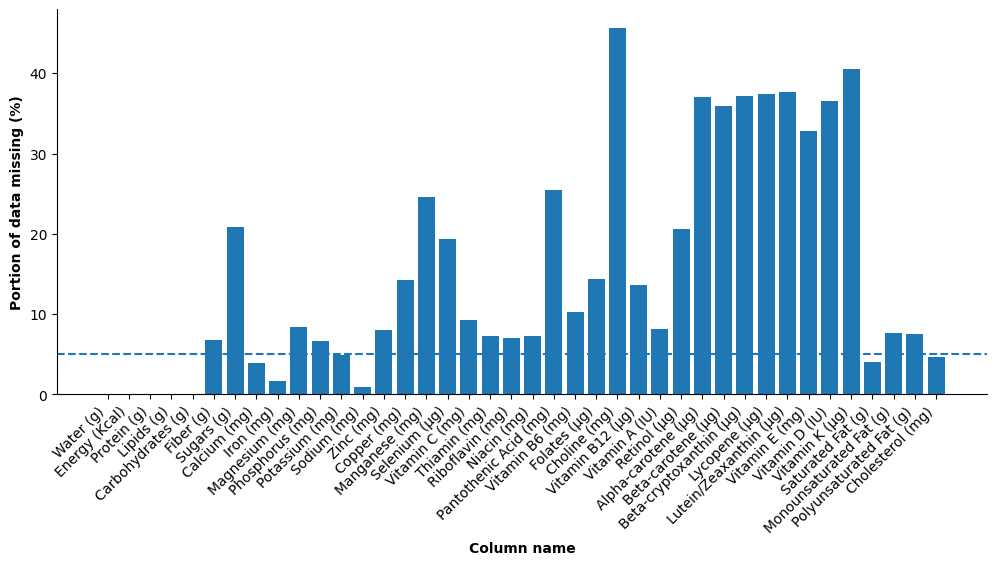

In [25]:
counts = df_raw.drop(columns=["Long Description", "Short Description", "Food Group Name", "Food Group"]).isna().sum() * 100 / len(df_raw)
_, ax = plt.subplots(figsize=(12, 5))
ax.bar(counts.index, counts)
plt.xticks(rotation=45, ha='right')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axhline(y=5, linestyle='dashed')
ax.set_xlabel("Column name", weight='bold')
ax.set_ylabel("Portion of data missing (%)", weight='bold')
plt.show()

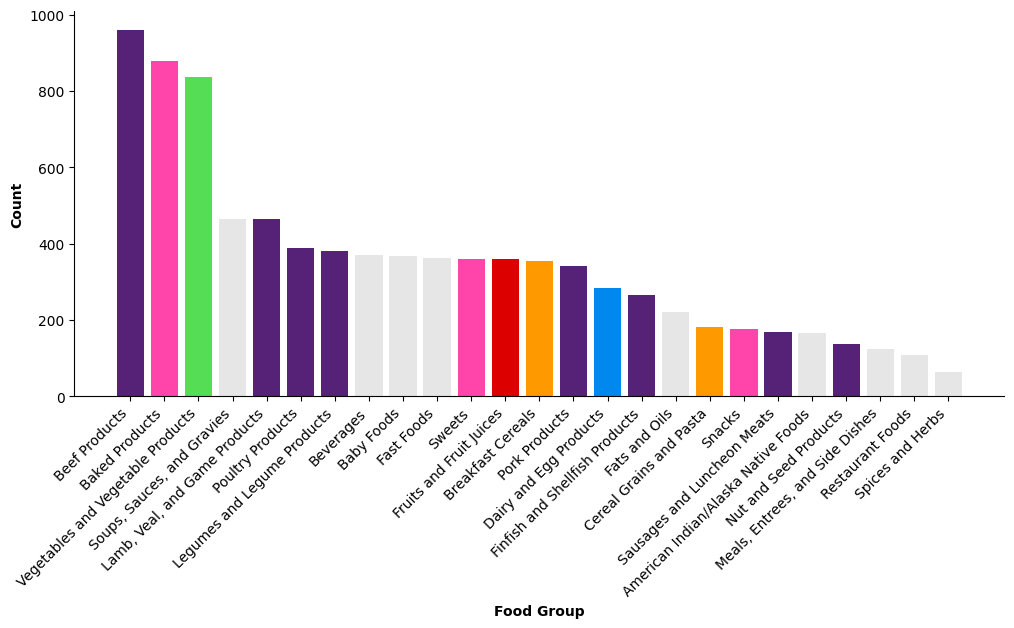

In [26]:
counts = df_raw['Food Group Name'].value_counts()
_, ax = plt.subplots(figsize=(12, 5))
ax.bar(counts.index, counts,
    color=('#527', '#f4a', '#5d5', '0.9', '#527', '#527', '#527', '0.9', '0.9', '0.9', '#f4a', '#d00', '#f90', '#527', '#08e', '#527', '0.9', '#f90', '#f4a', '#527', '0.9', '#527', '0.9', '0.9', '0.9')
)
plt.xticks(rotation=45, ha='right')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Food Group", weight='bold')
ax.set_ylabel("Count", weight='bold')
plt.show()

In [27]:
# First, remove very sparse columns and randomly impute slightly sparse columns
df_filtered.reset_index(drop=True, inplace=True)
for (i, col) in enumerate(df_filtered.columns.copy()):
    if df_filtered[col].dtype in (np.float64, np.int64):
        if df_filtered[col].count() / len(df_filtered[col]) < 0.95:
            df_filtered.drop(columns=col, inplace=True)
        else:
            # replacements = df_filtered[col].dropna().sample(n=len(df_filtered.index), replace=True, random_state=i, ignore_index=True)
            df_filtered[col].fillna(value=0, inplace=True)

In [28]:
# Second, simplify into more general food groups
conditions = [
    (df_filtered['Food Group'].isin(['0100'])),
    (df_filtered['Food Group'].isin(['0500', '0700', '1000', '1200', '1300', '1500', '1600', '1700'])),
    (df_filtered['Food Group'].isin(['0800', '2000'])),
    (df_filtered['Food Group'].isin(['0900'])),
    (df_filtered['Food Group'].isin(['1100'])),
    (df_filtered['Food Group'].isin(['1800', '1900', '2500'])),
    True
]
values = ['Dairy', 'Protein', 'Grains', 'Fruits', 'Vegetables', 'Sweets', None]
df_filtered['Food Group'] = np.select(conditions, values)
df_filtered.dropna(subset=['Food Group'], inplace=True)
df_filtered.head()

,Long Description,Short Description,Food Group Name,Food Group,Water (g),Energy (Kcal),Protein (g),Lipids (g),Carbohydrates (g),Calcium (mg),Iron (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Cholesterol (mg)
0,"Butter, salted","BUTTER,WITH SALT",Dairy and Egg Products,Dairy,15.87,717,0.85,81.11,0.06,24.0,0.02,24.0,643.0,51.368,215.0
1,"Butter, whipped, with salt","BUTTER,WHIPPED,W/ SALT",Dairy and Egg Products,Dairy,16.72,718,0.49,78.30,2.87,23.0,0.05,41.0,583.0,45.390,225.0
2,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS",Dairy and Egg Products,Dairy,0.24,876,0.28,99.48,0.00,4.0,0.00,5.0,2.0,61.924,256.0
3,"Cheese, blue","CHEESE,BLUE",Dairy and Egg Products,Dairy,42.41,353,21.40,28.74,2.34,528.0,0.31,256.0,1146.0,18.669,75.0
4,"Cheese, brick","CHEESE,BRICK",Dairy and Egg Products,Dairy,41.11,371,23.24,29.68,2.79,674.0,0.43,136.0,560.0,18.764,94.0


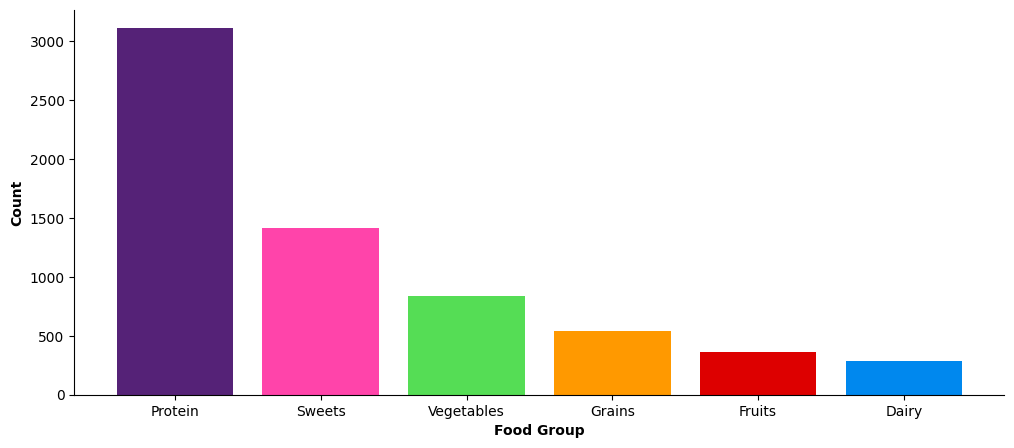

In [30]:
counts = df_filtered['Food Group'].value_counts()
print(counts)
_, ax = plt.subplots(figsize=(12, 5))
plt.bar(counts.index, counts, color=('#527', '#f4a', '#5d5', '#f90', '#d00', '#08e'))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Food Group", weight='bold')
ax.set_ylabel("Count", weight='bold')
plt.show()

In [9]:
# Third, drop descriptor columns
df_filtered.drop(columns=['Long Description', 'Short Description', 'Food Group Name'], inplace=True)
df_filtered.head()

,Food Group,Water (g),Energy (Kcal),Protein (g),Lipids (g),Carbohydrates (g),Calcium (mg),Iron (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Cholesterol (mg)
0,Dairy,15.87,717,0.85,81.11,0.06,24.0,0.02,24.0,643.0,51.368,215.0
1,Dairy,16.72,718,0.49,78.30,2.87,23.0,0.05,41.0,583.0,45.390,225.0
2,Dairy,0.24,876,0.28,99.48,0.00,4.0,0.00,5.0,2.0,61.924,256.0
3,Dairy,42.41,353,21.40,28.74,2.34,528.0,0.31,256.0,1146.0,18.669,75.0
4,Dairy,41.11,371,23.24,29.68,2.79,674.0,0.43,136.0,560.0,18.764,94.0


In [10]:
df_filtered.isnull().sum()

Food Group           0
Water (g)            0
Energy (Kcal)        0
Protein (g)          0
Lipids (g)           0
Carbohydrates (g)    0
Calcium (mg)         0
Iron (mg)            0
Potassium (mg)       0
Sodium (mg)          0
Saturated Fat (g)    0
Cholesterol (mg)     0
dtype: int64

In [11]:
df_filtered.describe()

,Water (g),Energy (Kcal),Protein (g),Lipids (g),Carbohydrates (g),Calcium (mg),Iron (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Cholesterol (mg)
count,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000
mean,51.472387,233.985933,13.198682,9.981685,23.689515,69.312538,2.796309,286.843731,270.517584,3.389606,46.265443
std,30.316553,151.852815,10.567255,12.065588,29.276428,198.816149,5.009636,358.888523,645.121844,4.957807,132.467482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.075000,117.000000,3.900000,1.200000,0.000000,9.000000,0.740000,141.000000,46.000000,0.197000,0.000000
50%,61.740000,203.000000,10.330000,5.900000,7.730000,19.000000,1.615000,251.000000,80.000000,1.622000,4.000000
75%,73.500000,352.250000,21.792500,14.300000,48.640000,60.000000,2.800000,344.000000,354.000000,4.437250,73.000000
max,97.920000,898.000000,88.320000,99.500000,100.000000,7364.000000,67.670000,16500.000000,27360.000000,61.924000,3100.000000


In [12]:
df_filtered.groupby('Food Group').describe()

Water (g)                                                       \
               count       mean        std   min     25%     50%      75%   
Food Group                                                                  
Dairy          283.0  58.042862  25.853435  0.24  42.360  61.770  79.6300   
Fruits         360.0  76.891111  19.341984  3.00  75.635  84.010  87.2500   
Grains         537.0  17.590652  26.003978  0.00   3.000   6.870  11.6200   
Protein       3108.0  60.559479  17.712752  0.25  57.080  64.315  71.1425   
Sweets        1416.0  18.299145  20.970752  0.00   2.800   7.450  31.9850   
Vegetables     836.0  82.471112  17.238286  2.00  77.460  89.210  92.5000   

                  Energy (Kcal)              ... Saturated Fat (g)          \
              max         count        mean  ...               75%     max   
Food Group                                   ...                             
Dairy       93.42         283.0  223.699647  ...           13.7745  61.924   
Fruits      94.30         360.0   85.413889  ...            0.0390   3.690   
Grains      89.15         537.0  322.474860  ...            0.8900   6.300   
Protein     97.70        3108.0  216.454311  ...            5.3825  61.257   
Sweets      96.90        1416.0  379.360876  ...            6.2925  32.277   
Vegetables  97.92         836.0   63.550239  ...            0.0900   6.091   

           Cholesterol (mg)                                                \
                      count       mean         std  min   25%   50%   75%   
Food Group                                                                  
Dairy                 283.0  98.742049  262.800683  0.0   5.0  20.0  85.5   
Fruits                360.0   0.000000    0.000000  0.0   0.0   0.0   0.0   
Grains                537.0   1.279330    8.773487  0.0   0.0   0.0   0.0   
Protein              3108.0  84.230051  164.089722  0.0  55.0  72.0  88.0   
Sweets               1416.0   8.177966   21.040583  0.0   0.0   0.0   7.0   
Vegetables            836.0   0.691388    6.575802  0.0   0.0   0.0   0.0   

                    
               max  
Food Group          
Dairy       2307.0  
Fruits         0.0  
Grains        95.0  
Protein     3100.0  
Sweets       258.0  
Vegetables   118.0  

[6 rows x 88 columns]

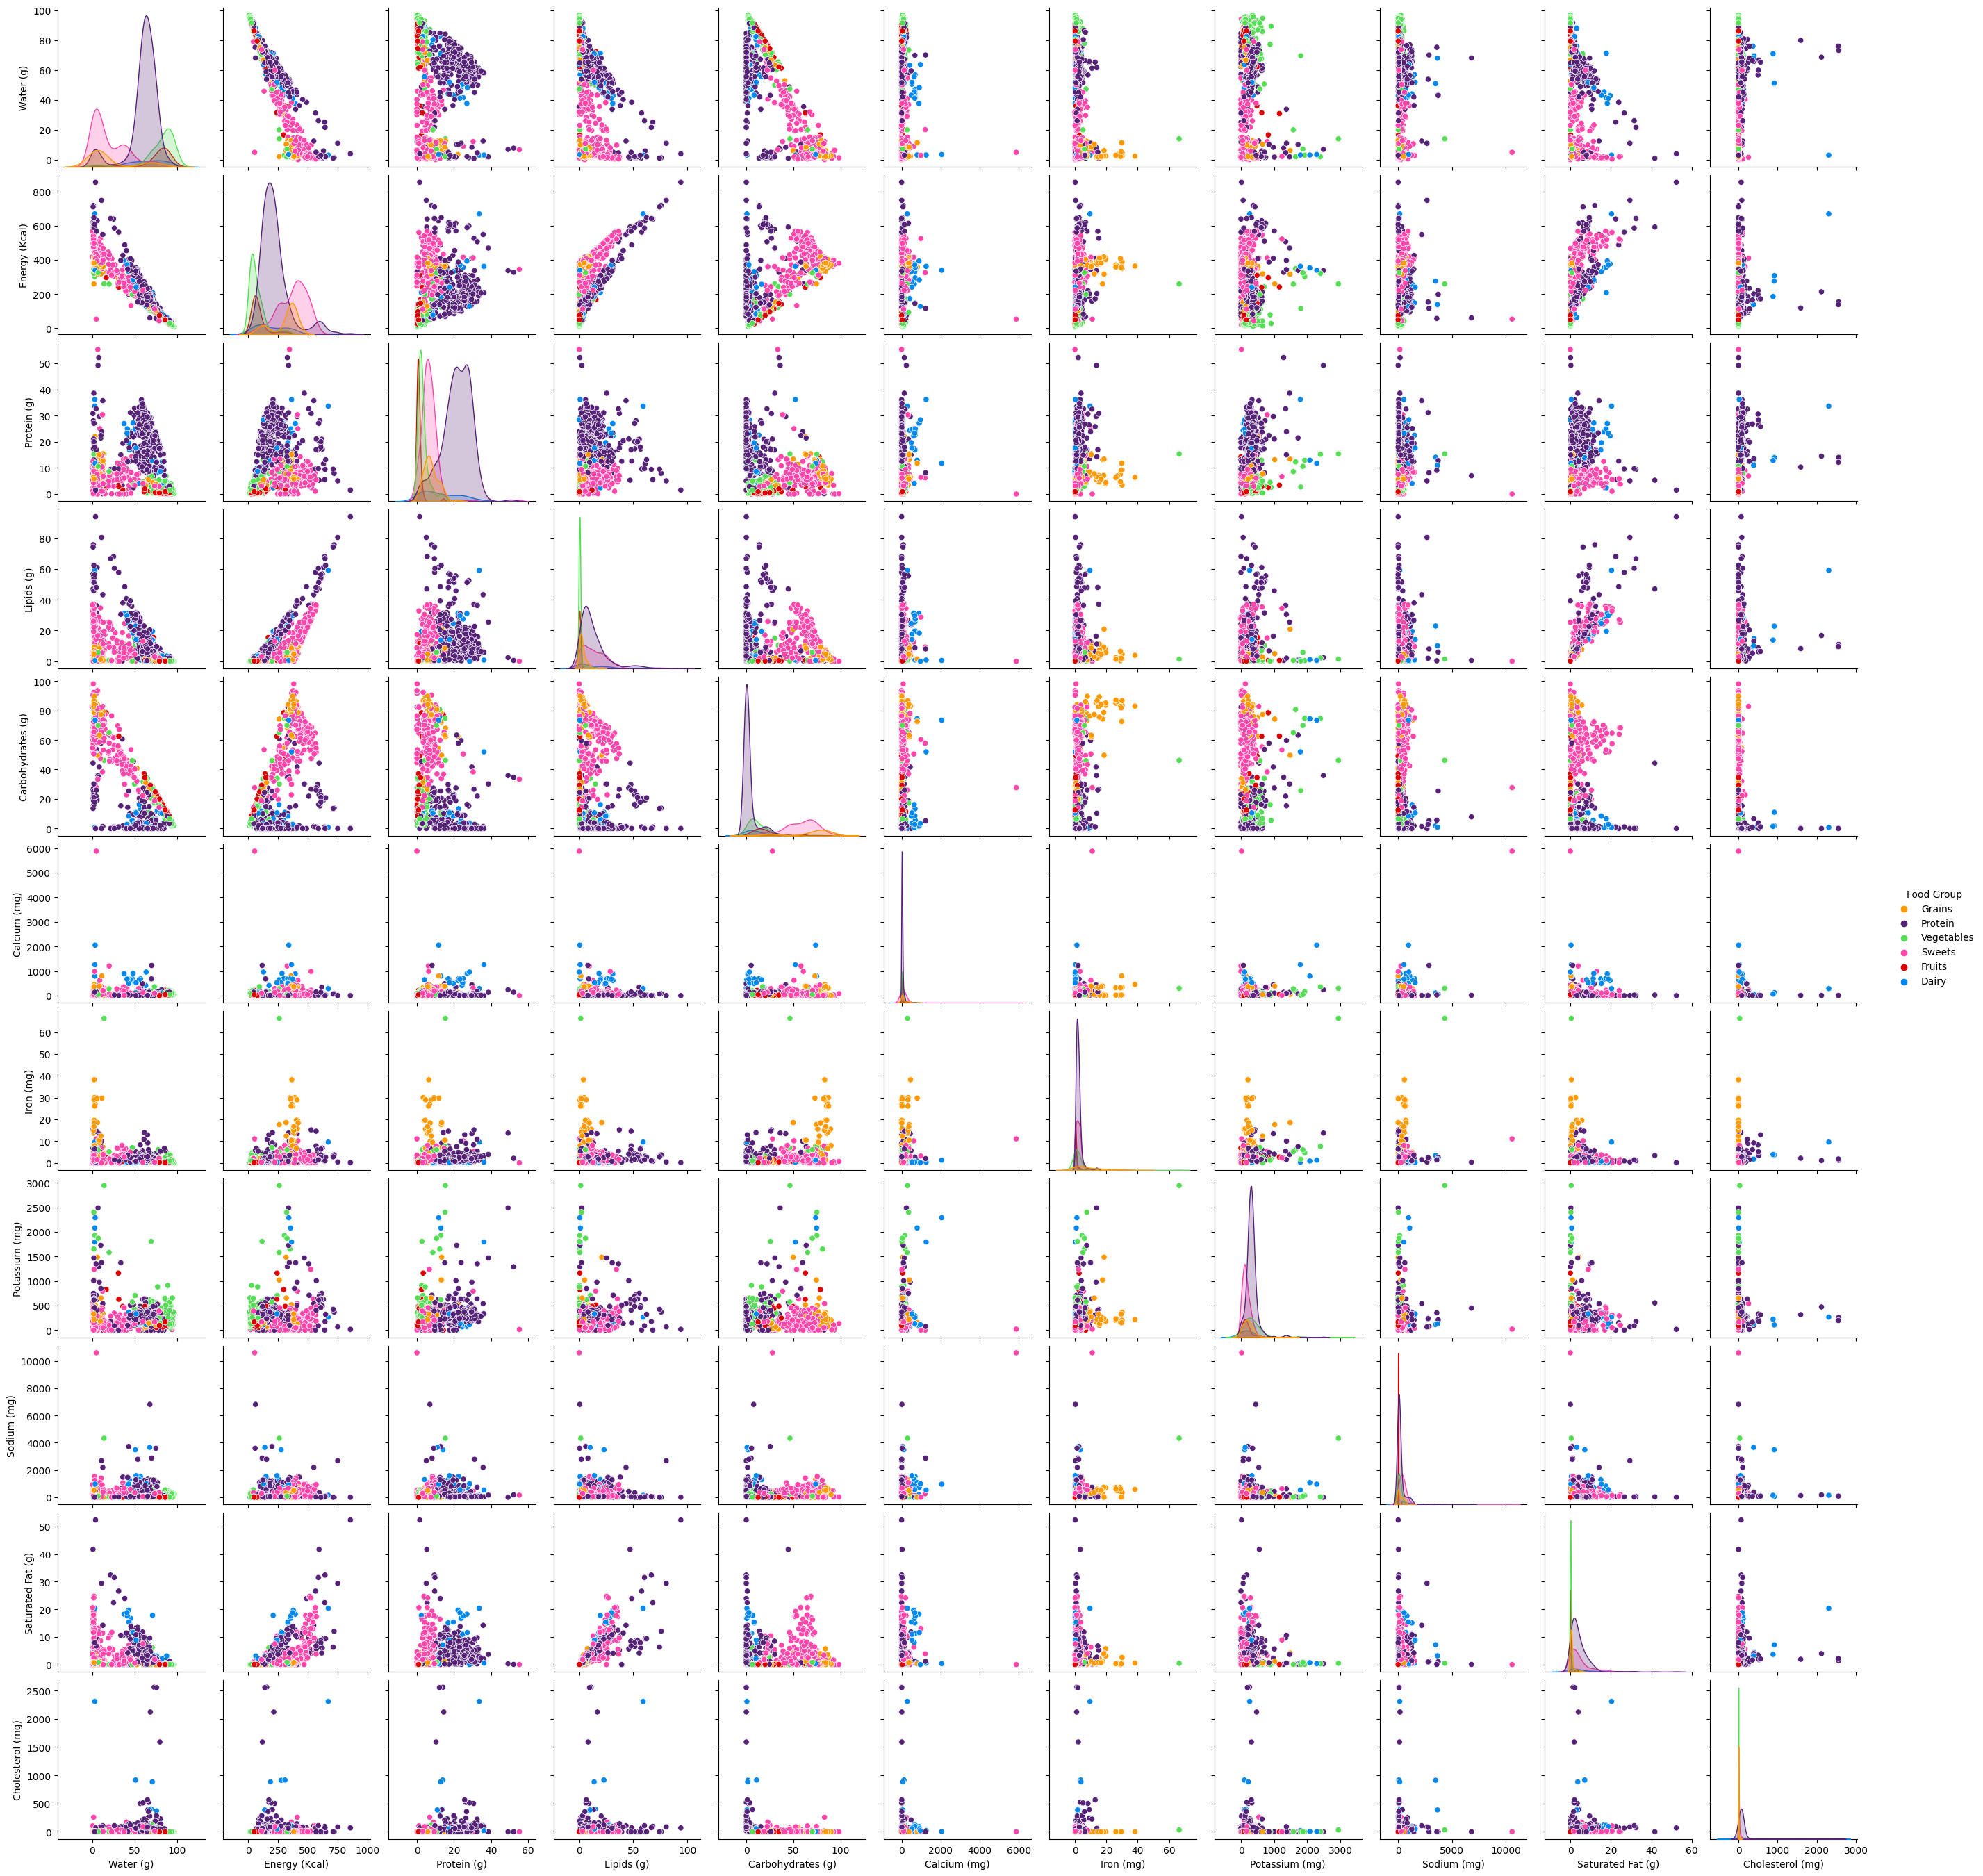

In [13]:
sns.pairplot(df_filtered.sample(1000, ignore_index=True, random_state=1), hue="Food Group",
    palette={
        'Dairy': '#08e', 
        'Fruits': '#d00', 
        'Grains': '#f90', 
        'Protein': '#527',
        'Sweets': '#f4a',
        'Vegetables': '#5d5'
    }
)

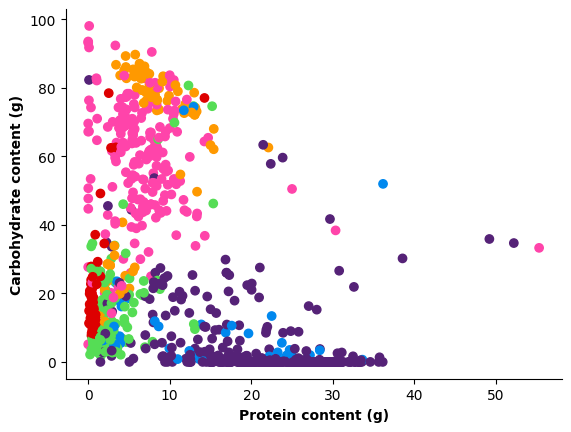

In [36]:
sample = df_filtered.sample(1000, ignore_index=True, random_state=1)
colors = {
    'Dairy': '#08e', 
    'Fruits': '#d00', 
    'Grains': '#f90', 
    'Protein': '#527',
    'Sweets': '#f4a',
    'Vegetables': '#5d5'
}


_, ax = plt.subplots()
scatter = ax.scatter(sample.loc[:, 'Protein (g)'], sample.loc[:, 'Carbohydrates (g)'], c=sample.loc[:, 'Food Group'].map(colors))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Protein content (g)", weight='bold')
ax.set_ylabel("Carbohydrate content (g)", weight='bold')


plt.show()

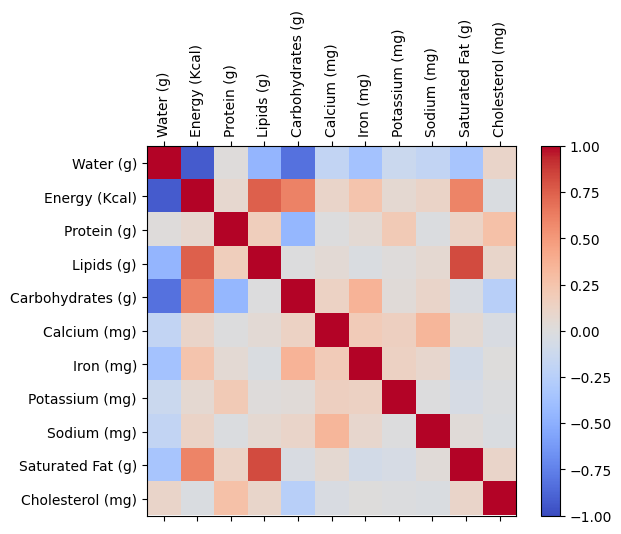

In [14]:
features = df_filtered.drop(columns='Food Group')
corr = features.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(features.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(features.columns)
ax.set_yticklabels(features.columns)
plt.show()

In [15]:
df_filtered.rename(columns={'Food Group': 'target'}).to_csv('dataset.csv', index=False)